In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:80% !important; }</style>"))

In [2]:
import seaborn as sns
import numpy as np
import pandas as pd
import glob
import scipy.stats
from matplotlib import pyplot as plt
import seaborn as sns
import plotly.express as px
plt.style.use('ggplot')
import os
if not os.path.exists("images"):
    os.mkdir("images")
import kaleido 
import plotly.graph_objects as go
import math
from scipy import stats
from sklearn.compose import make_column_selector as selector
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline

In [94]:
test = pd.read_csv('housing_pp.csv', index_col=0)
test.GarageYrBlt

0       1939.0
1       1984.0
2       1930.0
3       1940.0
4       2001.0
         ...  
2575    1916.0
2576    1955.0
2577    1949.0
2578    2000.0
2579    1993.0
Name: GarageYrBlt, Length: 2579, dtype: float64

In [3]:
housing = pd.read_csv('Ames_HousePrice.csv', index_col=0)

# reset index so there is only one number associated with each house
housing = housing.reset_index(drop = True)

# deletes duplicate point 
housing = housing.drop_duplicates()

In [4]:
#Convert some numerical variables to categorical 
housing.MSSubClass = housing.MSSubClass.apply(lambda x: str(x))
housing.MoSold = housing.MoSold.apply(lambda x: str(x))
housing.YrSold = housing.YrSold.apply(lambda x: str(x))

# Alley
housing.Alley.replace({'Grvl':1, 'Pave':2}, inplace=True)

# Lot Shape
housing.LotShape.replace({'Reg':1, 'IR1':2, 'IR2':3, 'IR3':4}, inplace=True)

# Land Contour
housing.LandContour.replace({'Low':1, 'HLS':2, 'Bnk':3, 'Lvl':4}, inplace=True)

# Utilities
housing.Utilities.replace({'ELO':1, 'NoSeWa':2, 'NoSewr':3, 'AllPub':4}, inplace=True)

# Land Slope..idk if I'm going to inlude this 
# further investigation there is correlation ..severe slope = more expensiveaaa
housing.LandSlope.replace({'Sev':1, 'Mod':2, 'Gtl':3}, inplace=True)

# Exterior Quality
housing.ExterQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Exterior Condition
housing.ExterCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Quality
housing.BsmtQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Condition
housing.BsmtCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Basement Exposure
housing.BsmtExposure.replace({'No':1, 'Mn':2, 'Av':3, 'Gd':4}, inplace=True)

# Finished Basement 1 Rating
housing.BsmtFinType1.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Finished Basement 2 Rating
housing.BsmtFinType2.replace({'Unf':1, 'LwQ':2, 'Rec':3, 'BLQ':4, 'ALQ':5, 'GLQ':6}, inplace=True)

# Heating Quality and Condition
housing.HeatingQC.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Kitchen Quality
housing.KitchenQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Home functionality
housing.Functional.replace({'Sal':1, 'Sev':2, 'Maj2':3, 'Maj1':4, 'Mod':5, 'Min2':6, 'Min1':7, 'Typ':8}, inplace=True)

# Fireplace Quality
housing.FireplaceQu.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Garage Finish
housing.GarageFinish.replace({'Unf':1, 'RFn':2, 'Fin':3}, inplace=True)

# Garage Quality
housing.GarageQual.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Garage Condition
housing.GarageCond.replace({'Po':1, 'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)

# Paved Driveway
housing.PavedDrive.replace({'N':1, 'P':2, 'Y':3}, inplace=True)

# Pool Quality
housing.PoolQC.replace({'Fa':2, 'TA':3, 'Gd':4, 'Ex':5}, inplace=True)


# Fill in missing values 

The features the were converted to numerical can have their null values filled with 0

In [5]:
converted_features = ['Alley','LotShape','LandContour','Utilities','LandSlope','ExterQual','ExterCond',
        'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2','HeatingQC',
        'KitchenQual','Functional','FireplaceQu','GarageFinish','GarageQual',
        'GarageCond','PavedDrive','PoolQC']

housing[converted_features] = housing[converted_features].fillna(0)

In [6]:
housing.columns[housing.isnull().sum() > 0]

Index(['LotFrontage', 'MasVnrType', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', 'Electrical', 'BsmtFullBath',
       'BsmtHalfBath', 'GarageType', 'GarageYrBlt', 'GarageCars', 'GarageArea',
       'Fence', 'MiscFeature'],
      dtype='object')

The missing categorical variables are 'MasVnrType', 'Electrical', 'GarageType', 'Fence',  and 'MiscFeature'
The can all be filled in with none except Electrical which will be replaced with the most common 

In [7]:
missing_categorical_none = ['MasVnrType', 'GarageType', 'Fence', 'MiscFeature']  

housing[missing_categorical_none] = housing[missing_categorical_none].fillna('None')

In [8]:
housing.Electrical.value_counts()

Electrical
SBrkr    2364
FuseA     168
FuseF      39
FuseP       7
Name: count, dtype: int64

In [9]:
housing.Electrical = housing.Electrical.fillna('SBrkr')

The features with remaining null values are numerical 
The can all be filled with 0 except for LotFrontage, GarageYrBlt (there is too much distance between 0 and 1985), 

In [10]:
housing.columns[housing.isnull().sum() > 0]

Index(['LotFrontage', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
       'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'GarageYrBlt',
       'GarageCars', 'GarageArea'],
      dtype='object')

In [11]:
missing_numerical = ['MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF',
                                'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
                                'GarageCars', 'GarageArea']
housing[missing_numerical] = housing[missing_numerical].fillna(0)

For LotFrontage find the mean proportion of the Lot Area that is connected to the street
For any null multiply the Lot Area of that property by this proportion 

In [12]:
proportion = (housing.LotFrontage/housing.LotArea).mean()
housing.LotFrontage.fillna((housing.LotArea * proportion), inplace=True)
housing[['LotFrontage', 'LotArea']]

,LotFrontage,LotArea
0,62.472926,7890
1,42.000000,4235
2,60.000000,6060
3,80.000000,8146
4,70.000000,8400
...,...,...
2575,70.105866,8854
2576,108.318076,13680
2577,82.000000,6270
2578,69.884162,8826


### PoolArea
Most houses do not have a pool and the size of the pool does not correlate with the price of the home so this will be changed to pool (yes/no)

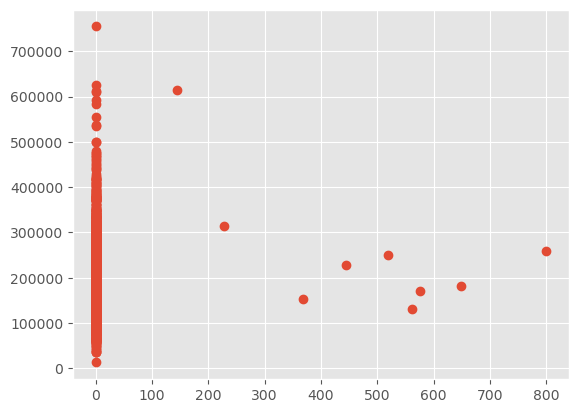

In [13]:
plt.plot(housing['PoolArea'], housing['SalePrice'], 'o')

In [14]:
f = lambda x: 'yes' if x>0 else 'no'
housing.PoolArea = housing.PoolArea.map(f)

In [15]:
housing = housing.rename(columns={"PoolArea": "PoolYN"})

### GarageYrBlt
There is a huge gap putting between 0 and the oldest garage (1985) 

In [16]:
housing['GarageYN'] = housing.GarageYrBlt
housing.GarageYN = housing.GarageYN.fillna(0)

In [17]:
housing.GarageYN = housing.GarageYN.map(f)

In [18]:
housing = housing.drop(['GarageYrBlt'], axis = 1).copy()

### Feature engineering 

In [19]:
# feature importance 
housing_drop = housing.drop(['SalePrice', 'PID'], axis = 1).copy()
X = housing_drop.columns
y = housing.SalePrice

In [20]:
from sklearn import linear_model 
from sklearn.model_selection import train_test_split
ols = linear_model.LinearRegression()

### Outliers
Many of the outliers are associated with sale that are not "Normal"

In [96]:
import plotly.express as px
fig = px.scatter(housing, x="OverallQual", y="SalePrice", 
                 color="SaleCondition", hover_data=['GrLivArea', 'PID'])
fig.update_traces(marker_size=10)
fig.show()

In [22]:
import plotly.express as px
fig = px.scatter(housing, x="GrLivArea", y="SalePrice", 
                 trendline = 'ols', hover_data=['OverallQual', 'PID'])
fig.update_traces(marker_size=10)
fig.show()

In [23]:
import plotly.express as px
fig = px.scatter(housing, x="GrLivArea", y="SalePrice", 
                 color="SaleCondition", hover_data=['OverallQual','PID'], trendline = 'ols')
fig.update_traces(marker_size=10)
fig.show()
# the one with PID 527326040 is an outlier for a home of quality 7 and is a family sale 
# PID 533350090 is priced very low for a home of quality 9 and is a family sale 
# PID 908154205 is price incredibly low for a home of that size and is a partial sale 
# PIDS 527252070, 528150070, and 527216080 are priced very high for a house of that size/qual and is a partial sale 
# Family, Alloca, and Adjland don't really have trendlines that make sense 

In [24]:
import plotly.express as px
fig = px.scatter(housing, x="GrLivArea", y="SalePrice", 
                 color="OverallQual", hover_data=['SaleCondition','PID'])
fig.update_traces(marker_size=10)
fig.show()

In [25]:
# there are alot of homes over the upper fence 
fig = px.box(housing, y="SalePrice", points="all", hover_data=['SaleCondition','OverallQual','PID'])
fig.show()

In [26]:
fig = px.box(housing, y="SalePrice", color = 'SaleCondition', points="all", hover_data=['OverallQual','GrLivArea','PID'])
fig.show()

Create different sets:
1. Get rid of all non normal sales + a few outliers 
2. Keep abnormal and partial + get rid of a few outliers within those groups 

In [63]:
df = housing.copy()
df_normal = df.copy()
df_ab_par = df.copy()
df_visual = df.copy()

In [64]:
index_names_normal = df_normal[df_normal['SaleCondition'] != 'Normal'].index
df_normal.drop(index_names_normal, inplace = True)

In [65]:
index_names_ab_par = df_ab_par[(df_ab_par['SaleCondition'] == 'Family') | 
                               (df_ab_par['SaleCondition'] == 'AdjLand') |
                               (df_ab_par['SaleCondition'] == 'Alloca')].index
df_ab_par.drop(index_names_ab_par, inplace = True)

In [71]:
df_ab_par.loc[df_ab_par.PID == 908154205]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,PoolYN,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageYN
309,908154205,4676,184750,60,RL,130.0,40094,Pave,0.0,2,...,no,0.0,None,None,0,10,2007,New,Partial,yes


In [74]:
df_ab_par = df_ab_par.drop(309)

In [76]:
df_ab_par.loc[df_ab_par.PID == 527252070]

,PID,GrLivArea,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,...,PoolYN,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,GarageYN
617,527252070,1419,392000,20,RL,60.0,8089,Pave,0.0,1,...,no,0.0,None,None,0,10,2007,New,Partial,yes


In [77]:
df_ab_par = df_ab_par.drop(617)

In [78]:
fig = px.scatter(df_ab_par, x="GrLivArea", y="SalePrice", 
                 color="OverallQual", hover_data=['SaleCondition','PID'])
fig.update_traces(marker_size=10)
fig.show()

In [79]:
df_ab_par.to_csv('housing_partial_abnormal.csv')

In [80]:
df_normal.to_csv('housing_normal.csv')

In [81]:
outliers = []
def detect_outliers_zscore(data):
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for i in data:
        z_score = (i-mean)/std
        if (np.abs(z_score) > thres):
            outliers.append(i)
    return outliers 
sample_outliers = detect_outliers_zscore(df_ab_par.SalePrice)
print("Outliers from Z-scores method: ", sample_outliers)

Outliers from Z-scores method:  [450000, 615000, 468000, 500067, 475000, 423000, 500000, 417500, 479069, 415000, 421250, 415000, 535000, 419005, 437154, 425000, 611657, 591587, 455000, 405000, 418000, 538000, 404000, 440000, 412500, 755000, 555000, 462000, 430000, 410000, 625000, 610000, 466500, 475000, 584500, 460000, 445000, 410000, 470000, 441929, 410000, 451950]


In [84]:
sample_outliers

[404000,
 405000,
 410000,
 410000,
 410000,
 412500,
 415000,
 415000,
 417500,
 418000,
 419005,
 421250,
 423000,
 425000,
 430000,
 437154,
 440000,
 441929,
 445000,
 450000,
 451950,
 455000,
 460000,
 462000,
 466500,
 468000,
 470000,
 475000,
 475000,
 479069,
 500000,
 500067,
 535000,
 538000,
 555000,
 584500,
 591587,
 610000,
 611657,
 615000,
 625000,
 755000]